In [ ]:
# Internship Task 2: Predict Future Stock Prices
# Author: Anoosha Ikram  
# Goal: Use historical stock data to predict the next day's closing price using regression models (Linear Regression or Random Forest). 
# We'll use features such as Open, High, Low, and Volume.

In [9]:
!pip install yfinance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/949.2 kB ? eta -:--:--
     ------------------- ---------------- 524.3/949.2 kB 840.2 kB/s eta 0:00:01
     ----------------------------- ------ 786.4/949.2 kB 838.9 kB/s eta 0:00:01
     ------------------------------------ 949.2/949.2 kB 815.0 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   -----------------------------

In [10]:
import yfinance as yf
data = yf.download('AAPL', period='1y')
data.head()


C:\Users\hp\AppData\Local\Temp\ipykernel_9096\1068689230.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', period='1y')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-07-31,221.046234,222.778140,219.602987,220.409214,50036300
2024-08-01,217.343552,223.435059,216.009793,223.325570,62501000
2024-08-02,218.836563,224.549849,216.696577,218.129861,105568600
2024-08-05,208.295853,212.506158,195.087620,198.163233,119548600
2024-08-06,206.265366,209.012528,200.134051,204.344357,69660500


In [13]:
# 🔽 Importing Required Libraries

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
## 🧹 Step 2: Preprocess the Data
# Creating a copy to avoid modifying original
df = data[['Open', 'High', 'Low', 'Volume', 'Close']].copy()

# Adding the target column: next day's close price
df['Next_Close'] = df['Close'].shift(-1)

# Dropping the last row as it has NaN in 'Next_Close'
df.dropna(inplace=True)

# Checking the updated dataset
df.head()


Price,Open,High,Low,Volume,Close,Next_Close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-07-31,220.409214,222.778140,219.602987,50036300,221.046234,217.343567
2024-08-01,223.325586,223.435074,216.009808,62501000,217.343567,218.836563
2024-08-02,218.129861,224.549849,216.696577,105568600,218.836563,208.295868
2024-08-05,198.163247,212.506173,195.087635,119548600,208.295868,206.265366
2024-08-06,204.344357,209.012528,200.134051,69660500,206.265366,208.843323


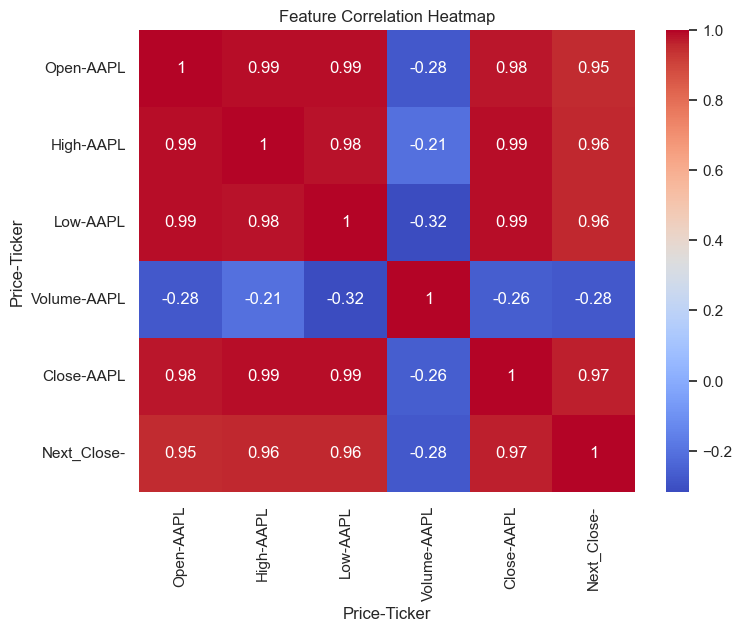

In [21]:
## 📊 Step 3: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [25]:
## 🧠 Step 4: Train-Test Split
# Features and target
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
## 🔍 Step 5: Model Training and Evaluation
# Training Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicting
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression MSE:", mse_lr)
print("Linear Regression R² Score:", r2_lr)


Linear Regression MSE: 12.72025535707906
Linear Regression R² Score: 0.9452913918833665


In [29]:
# Training Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicting
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R² Score:", r2_rf)


Random Forest MSE: 18.785236767935476
Random Forest R² Score: 0.9192064838428566


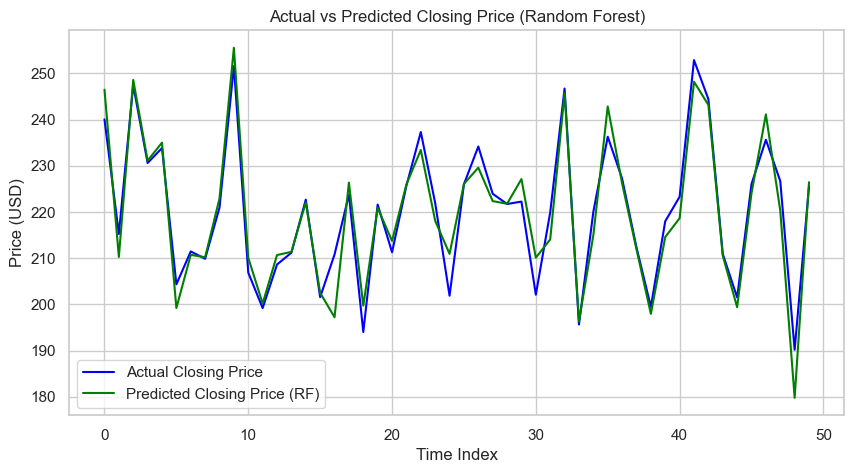

In [31]:
## 📈 Step 6: Visualization — Actual vs Predicted Closing Prices

# Plotting for Random Forest
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Closing Price', color='blue')
plt.plot(y_pred_rf, label='Predicted Closing Price (RF)', color='green')
plt.title('Actual vs Predicted Closing Price (Random Forest)')
plt.xlabel('Time Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


In [ ]:
## 📝 Final Insights

#- Random Forest typically performs better than Linear Regression on stock data due to non-linearity.
#- R² score indicates how well the model predicts unseen data (closer to 1 is better).
#- This is a basic model and doesn't consider time series dependencies deeply — in real-world applications, 
#models like LSTM or ARIMA are better suited for sequence forecasting.
